**Circular data**, also known as angular data or directional data, is a type of data that represents measurements or observations that occur on a circular or periodic scale. In other words, circular data is data that has a natural circular or periodic structure, where the values wrap around after reaching a certain point, similar to angles measured in degrees or compass directions.


Examples of situations where circular data is encountered include:

- Meteorology: Wind direction data, which can range from 0° to 360°.
- Biology: Animal migration patterns or circadian rhythms.
- Astronomy: The positions of stars and planets in the sky over time.
- Geography: Compass directions or longitudes on the Earth's surface.
- Time Series Analysis: Representing time of day or cyclical patterns within data.

Key characteristics of circular data include:

Cyclic Nature: Circular data is inherently cyclical, meaning that it repeats itself after a certain interval or period. For example, angles measured in degrees range from 0° to 360°, and after 360°, they start again at 0°.

Directional: Circular data often represents directions, orientations, phases, or angles. Examples include compass directions (north, south, east, west), time of day (hours on a clock), wind direction, and the position of celestial objects in the sky.

Wrap-Around: Circular data values "wrap around" when they reach the upper limit, similar to how a clock's hour hand moves from 11 to 12. This wrap-around behavior is essential to understanding circular data.

Periodic Statistics: When analyzing circular data, specialized statistical methods are used to account for its circular nature. Common statistics for circular data include mean direction, circular variance, and circular correlation.

Visualization: Circular data is often visualized using circular plots, circular histograms, or polar plots to effectively represent the cyclical patterns.

 Circular data typically requires transformation into Cartesian coordinates (sine and cosine components) to facilitate clustering.

 for example let's assume we have a dataset that contains the migration directions of a group of birds. Each data point represents the direction in degrees that a bird flew during migration.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


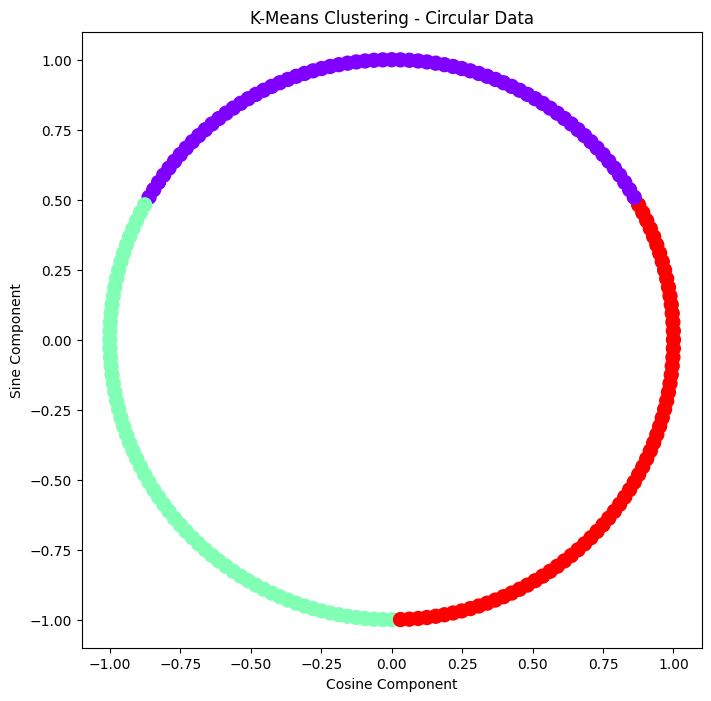

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic circular data
np.random.seed(0)
n_samples = 200
angle = np.linspace(0, 2 * np.pi, n_samples, endpoint=False)
data = np.column_stack((np.cos(angle), np.sin(angle)))

# Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=100)
plt.title('K-Means Clustering - Circular Data')
plt.xlabel('Cosine Component')
plt.ylabel('Sine Component')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering - Circular Scatter Plot')

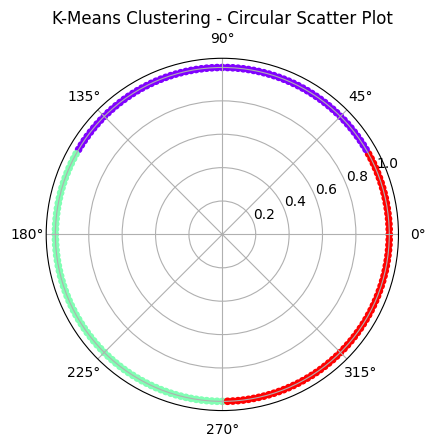

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Generate synthetic circular data
np.random.seed(0)
n_samples = 200
angle = np.linspace(0, 2 * np.pi, n_samples, endpoint=False)
data = np.column_stack((np.cos(angle), np.sin(angle)))

# Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Visualize the clustering results using circular plots
plt.figure(figsize=(10, 5))

# Circular scatter plot
plt.subplot(1, 2, 1, polar=True)
plt.scatter(angle, np.ones_like(angle), c=cluster_labels, cmap='rainbow', s=20)
plt.title('K-Means Clustering - Circular Scatter Plot')





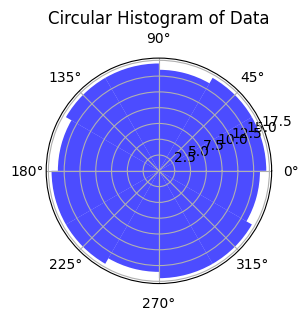

In [7]:
# Circular histogram
plt.subplot(1, 2, 2, polar=True)
n_bins = 12
hist, bin_edges = np.histogram(angle, bins=n_bins, range=(0, 2 * np.pi))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = 2 * np.pi / n_bins
plt.bar(bin_centers, hist, width=width, align='center', color='blue', alpha=0.7)
plt.title('Circular Histogram of Data')
plt.show()

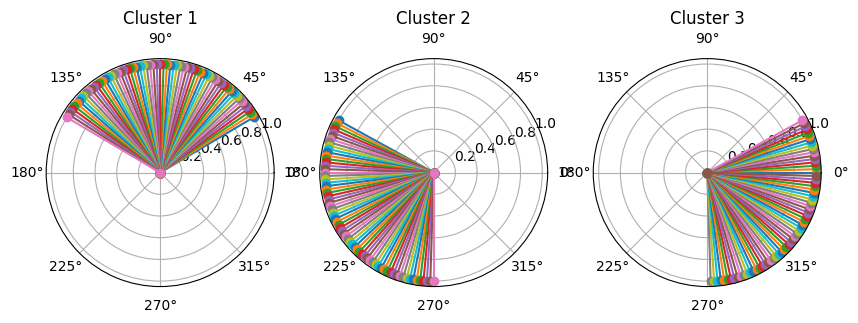

In [8]:
# Visualize the clustering results using polar plots
plt.figure(figsize=(10, 5))

for i in range(k):
    cluster_data = data[cluster_labels == i]
    plt.subplot(1, k, i + 1, polar=True)
    plt.title(f'Cluster {i + 1}')
    for point in cluster_data:
        plt.plot([0, np.arctan2(point[1], point[0])], [0, np.linalg.norm(point)], marker='o')

plt.show()
